# Can we determine the best-performing foreign player in the 2020 Indian Premier League season?

In [38]:
#IMPORT FUNCTIONS (NumPy, Panda, Math, MatPlotLib)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

######################################################################################################

#Basic Statistical Functions:

def standardDeviation(xList, xAvg):
    n = len(xList)
    numerator = 0
    for i in range(n):
        if math.isnan(xList[i]) == False:
            numerator = numerator + ((xList[i] - xAvg)**2)
    fraction = (1.0 * numerator) / n
    stdDev = np.sqrt(fraction)
    return stdDev
    
def square(x):
    return x * x

def divideTwoLists(xList, yList):
    if len(xList) == len(yList):
        zList = [None] * len(xList)
        for i in range(len(xList)):
            quotient = xList[i] / yList[i]
            zList[i] = quotient
    return zList

def findMean(lst):
    avg = 0
    n = len(lst)
    for value in lst:
        if math.isnan(value) == False:
            avg = avg + value
    avg = (1.0 * avg) / n
    return avg
        
    
def pearsonNum(xList, yList):
    if len(xList) == len(yList):
        n = len(xList)
        xyList = [None] * n
        for i in range(n):
            xyList[i] = xList[i] * yList[i]
        numerator = (n * np.sum(xyList)) - np.sum(xList) - np.sum(yList)
        return numerator
    else:
        return "There's Been An Error!"
    
def pearsonDenom(xList, yList):
    if len(xList) == len(yList):
        n = len(xList)
        xListS = sum(map(lambda x: square(x), xList))
        yListS = sum(map(lambda y: square(y), yList))
        
        xLeft = n * (xListS)
        yLeft = n * (yListS)
        
        xRight = square(np.sum(xList))
        yRight = square(np.sum(yList))
        
        denominator = (xLeft - xRight) * (yLeft - yRight)
        return denominator        
    else:
        return "There's Been An Error!"
    
def pearsonCoeff(xList, yList):
    return pearsonNum(xList, yList) / pearsonDenom(xList, yList)
    

# Adding Table of Foreign Players 

Input file is a CSV file containing statistics on every foreign player involved in 2020 IPL season. Due to the COVID-19 global pandemic, and other extraneous factors, many players pulled out, so I assigned a new table to contain the statistics of players that played in at least 1 game.

In [39]:
csvURL = "https://raw.githubusercontent.com/gprasad125/cricketProject/main/fullStatistics.csv?token=AQETVXPXZE5OZQWTSZTB5Z27XNAI2"

foreignPlayers = pd.read_csv(csvURL)
activePlayers = foreignPlayers[foreignPlayers["Matches Played"] > 0]
activePlayers

HTTPError: HTTP Error 404: Not Found

Here are the statistics measured for each player, and what type of data type they are measured in.

Some important cricket-specific notes:
    - A player's Batting Average is calculated as (total # of runs scored / total # of innings the player got out)
    - A player's Strike Rate is calculated as (total # of runs scored / total # of balls faced) 
    - An "over" is a set of six balls, delivered by one bowler at a time.
    - A player's Bowling Average is calculated as (total # of wickets taken / total # of runs conceded)
    - A player's Economy Rate is calculated as (total # of runs conceded / total # of overs delivered)
    - A player's Bowling SR is calculated as (total # of wickets taken / total # of balls delivered)
    
Some of these statistics, such as balls delievered, or innings a player got out, were not included in the dataset, because other statistics utilize these statistics as part of their calculation.

Below we can see the different statistics measured, and the types of data values they carry. 

In [40]:
activePlayers.dtypes

Player Name                    object
Nationality                    object
Team                           object
Matches Played                  int64
Batting Innings                 int64
Percent of Matches Batting    float64
Runs Scored                     int64
Batting Average               float64
Strike Rate                   float64
Bowling Innings                 int64
Percent of Matches Bowling    float64
Overs Delivered               float64
Wickets                         int64
Bowling Average               float64
Economy Rate                  float64
Bowling SR                    float64
dtype: object

# Defining Batsmen, Bowlers, and All-Rounders

Cricketers perform one of three distinct roles in the game. They can be batsmen (those who score runs for the team), bowlers (those who take wickets and try and limit the other team's score), or all-rounders (those who can both bat and bowl serviceably). 

Below, we use the table's data to divide the players into the categories they perform:
- Batsman are defined as "Players who spent over 70% of their total matches batting, and less than 30% of their total matches bowling." We also will drop the bowling statistics for these players as we are only interested in their batting statistics.


- Bowlers are defined as "Players who spent over 70% of their total matches bowling, and less than 50% of their total matches batting." We are taking this 50% cutoff for the greater likelihood than any bowler will bat, as compared to any batter bowling. We will also drop the batting statistics for these players, as we are only interested in their batting statistics. 


- All-Rounders are defined as "Players who spent over 50% of their total matches bowling, and over 50% of their total matches batting." We will not drop any stats as we are interested in both types of statistics for these type of players.

Something that will help us define the above categories will be finding the percentage of matches played a particular player spent batting or bowling.

In [41]:
matchesPlayed = activePlayers["Matches Played"].tolist()
battingInnings = activePlayers["Batting Innings"].tolist()
bowlingInnings = activePlayers["Bowling Innings"].tolist()

percentageBatting = divideTwoLists(battingInnings, matchesPlayed)
percentageBowling = divideTwoLists(bowlingInnings, matchesPlayed)

activePlayers.insert(5, "Percent of Matches Batting", percentageBatting)
activePlayers.insert(10, "Percent of Matches Bowling", percentageBowling)

activePlayers

ValueError: cannot insert Percent of Matches Batting, already exists

Defining Batsmen

In [42]:
batsmen = activePlayers.loc[(activePlayers["Percent of Matches Batting"] > 0.7) & (activePlayers["Percent of Matches Bowling"] < 0.3)].drop(["Bowling Innings","Percent of Matches Bowling", "Overs Delivered",  "Wickets", "Bowling Average", "Economy Rate", "Bowling SR"], axis = 1)
batsmen

,Player Name,Nationality,Team,Matches Played,Batting Innings,Percent of Matches Batting,Runs Scored,Batting Average,Strike Rate
0,AB de Villiers,South Africa,Royal Challengers Bangalore,15,14,0.933333,454,45.40,158.74
1,Aaron Finch,Australia,Royal Challengers Bangalore,15,12,0.800000,268,22.33,111.20
4,Josh Philippe,Australia,Royal Challengers Bangalore,5,5,1.000000,78,19.50,101.29
9,Eoin Morgan,England,Kolkata Knight Riders,14,14,1.000000,418,41.80,138.41
13,Tom Banton,England,Kolkata Knight Riders,2,2,1.000000,18,9.00,90.00
18,Steve Smith,Australia,Rajasthan Royals,14,14,1.000000,311,25.91,131.22
19,David Miller,South Africa,Rajasthan Royals,1,1,1.000000,0,0.00,NaN
21,Jos Buttler,England,Rajasthan Royals,13,12,0.923077,328,32.80,144.49
26,Chris Gayle,West Indies,Kings XI Punjab,7,7,1.000000,288,41.14,137.14
29,Nicholas Pooran,West Indies,Kings XI Punjab,14,14,1.000000,353,35.30,169.71


Defining Bowlers

In [43]:
bowlers = activePlayers.loc[(activePlayers["Percent of Matches Bowling"] > 0.7) & (activePlayers["Percent of Matches Batting"] < 0.5)].drop(["Batting Innings", "Percent of Matches Batting", "Runs Scored","Batting Average", "Strike Rate"], axis = 1)
bowlers

,Player Name,Nationality,Team,Matches Played,Bowling Innings,Percent of Matches Bowling,Overs Delivered,Wickets,Bowling Average,Economy Rate,Bowling SR
3,Isuru Udana,Sri Lanka,Royal Challengers Bangalore,10,10,1.000000,29.0,8,35.25,9.72,21.7
5,Adam Zampa,Australia,Royal Challengers Bangalore,2,3,1.500000,11.0,2,46.00,8.36,33.0
8,Dale Steyn,South Africa,Royal Challengers Bangalore,3,3,1.000000,11.4,1,133.00,11.40,70.0
14,Lockie Ferguson,New Zealand,Kolkata Knight Riders,5,5,1.000000,19.5,6,24.66,7.46,19.8
32,Sheldon Cottrell,West Indies,Kings XI Punjab,6,6,1.000000,20.0,6,29.33,8.80,20.0
35,Dwayne Bravo,West Indies,Chennai Super Kings,6,5,0.833333,18.0,5,31.40,8.72,21.6
37,Mitchell Santner,New Zealand,Chennai Super Kings,2,2,1.000000,7.0,2,26.50,7.57,21.0
38,Imran Tahir,South Africa,Chennai Super Kings,3,3,1.000000,11.0,1,76.00,6.90,66.0
39,Lungi Ngidi,South Africa,Chennai Super Kings,4,4,1.000000,16.0,9,18.55,10.43,10.6
40,Josh Hazlewood,Australia,Chennai Super Kings,3,3,1.000000,10.0,1,64.00,6.40,60.0


Defining All-Rounders

In [44]:
allRounders = activePlayers.loc[(activePlayers["Percent of Matches Batting"] >= 0.5) & (activePlayers["Percent of Matches Bowling"] >= 0.5)]
allRounders

,Player Name,Nationality,Team,Matches Played,Batting Innings,Percent of Matches Batting,Runs Scored,Batting Average,Strike Rate,Bowling Innings,Percent of Matches Bowling,Overs Delivered,Wickets,Bowling Average,Economy Rate,Bowling SR
2,Moeen Ali,England,Royal Challengers Bangalore,3,3,1.000000,12,4.00,75.00,3,1.000000,5.0,1,42.00,8.40,30.0
6,Chris Morris,South Africa,Royal Challengers Bangalore,9,5,0.555556,34,8.50,161.90,9,1.000000,31.4,11,19.09,6.63,17.2
10,Andre Russell,West Indies,Kolkata Knight Riders,10,9,0.900000,117,13.00,144.44,7,0.700000,18.0,6,29.16,9.72,18.0
11,Sunil Narine,West Indies,Kolkata Knight Riders,10,9,0.900000,121,13.44,142.35,10,1.000000,38.0,5,60.40,7.94,45.6
16,Pat Cummins,Australia,Kolkata Knight Riders,14,11,0.785714,146,20.85,128.07,14,1.000000,52.0,17,20.94,6.84,18.3
20,Ben Stokes,England,Rajasthan Royals,8,8,1.000000,285,40.71,142.50,6,0.750000,15.0,2,77.00,10.26,45.0
22,Jofra Archer,England,Rajasthan Royals,14,10,0.714286,113,18.83,179.36,14,1.000000,55.4,20,18.25,6.55,16.7
23,Andrew Tye,Australia,Rajasthan Royals,1,1,1.000000,6,6.00,100.00,1,1.000000,4.0,1,50.00,12.50,24.0
24,Tom Curran,England,Rajasthan Royals,5,4,0.800000,83,83.00,133.87,5,1.000000,18.1,3,69.33,11.44,36.3
27,Glenn Maxwell,Australia,Kings XI Punjab,13,11,0.846154,108,15.42,101.88,7,0.538462,21.0,3,56.33,8.04,42.0


Checking that all players are accounted for

In [46]:
#Getting the individual names for each category: Batsmen, Bowlers, All-Rounders
batNames = batsmen["Player Name"].tolist()
bowlNames = bowlers["Player Name"].tolist()
allRNames = allRounders["Player Name"].tolist()

#Getting all the names from the full table
names = activePlayers["Player Name"].tolist()

#Checking each category's list of names vs the total list of names by removing duplicates
for name in names:
    if name in batNames:
        names.remove(name)
    elif name in bowlNames:
        names.remove(name)
    elif name in allRNames:
        names.remove(name)

#If all names from the full table are accounted, this should yield True
#len(names) == 0
names

#strin = "Aaron Finch"

batNames

['AB de Villiers',
 'Aaron Finch ',
 'Josh Philippe',
 'Eoin Morgan',
 'Tom Banton',
 'Steve Smith',
 'David Miller',
 'Jos Buttler',
 'Chris Gayle',
 'Nicholas Pooran',
 'Shane Watson',
 'Faf du Plessis',
 'Quinton de Kock',
 'Kane Williamson',
 'David Warner',
 'Jonny Bairstow',
 'Shimron Hetmeyer',
 'Alex Carey']

# Batsmen Calculations

Let's begin with the calculations for the batsmen. There are three categories we measure:
    - Runs Scored, a measure of impact: Did this player contribute a large amount to the team's overall season?
    - Batting Average, a measure of consistency: Did this player perform well in most matches?
    - Strike Rate, a measure of efficiency: How quickly did this player score his runs?
    
A good place to start would be to calculate the means and medians of each value.

In [18]:
meanRuns = findMean(batsmen["Runs Scored"].tolist())
meanBatAvg = findMean(batsmen["Batting Average"].tolist())
meanSR = findMean(batsmen["Strike Rate"].tolist())

means = [meanRuns, meanBatAvg, meanSR]
means

[288.55555555555554, 29.594999999999995, 124.33666666666666]

In [19]:
medianRuns = np.median(batsmen["Runs Scored"].tolist())
medianBatAvg = np.nanmedian(batsmen["Batting Average"].tolist())
medianSR = np.nanmedian(batsmen["Strike Rate"].tolist())

medians = [medianRuns, medianBatAvg, medianSR]
medians

[314.0, 32.08, 134.64]

((array([3., 1., 0., 1., 1., 5., 2., 1., 2., 2.]),
  array([  0. ,  54.8, 109.6, 164.4, 219.2, 274. , 328.8, 383.6, 438.4,
         493.2, 548. ]),
  <a list of 10 Patch objects>),
 315.2473455699332)

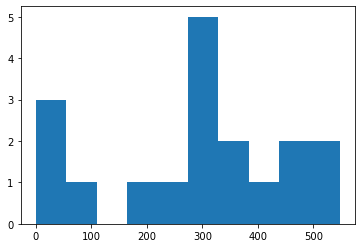

In [19]:
#Calculating Standard Deviation for Runs Scored
runsScored = batsmen["Runs Scored"].tolist()
avgRuns = mean(runsScored)
runScoreSD = standardDeviation(runsScored, avgRuns)
plt.hist(runsScored), runScoreSD

((array([1., 1., 0., 1., 3., 1., 2., 3., 2., 4.]),
  array([ 0.  ,  4.54,  9.08, 13.62, 18.16, 22.7 , 27.24, 31.78, 36.32,
         40.86, 45.4 ]),
  <a list of 10 Patch objects>),
 17.039025630723266)

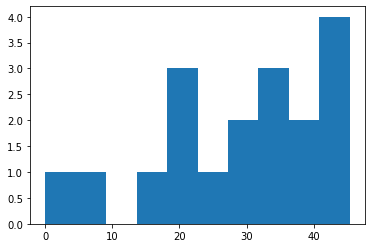

In [20]:
#Calculating Standard Deviation for Batting Average
battingAvg = batsmen["Batting Average"].tolist()
avgBat = mean(battingAvg)
batAvgSD = standardDeviation(battingAvg, avgBat)
plt.hist(battingAvg), batAvgSD

C:\Users\gokul\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gokul\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


((array([1., 1., 2., 1., 1., 4., 4., 1., 1., 1.]),
  array([ 90.   ,  97.971, 105.942, 113.913, 121.884, 129.855, 137.826,
         145.797, 153.768, 161.739, 169.71 ]),
  <a list of 10 Patch objects>),
 112.07865383044376)

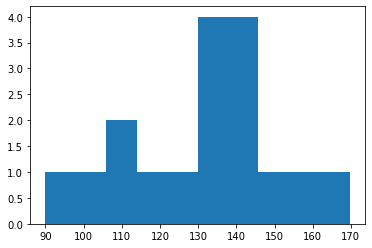

In [21]:
#Calculating Standard Deviation for Strike Rate
strikeRates = batsmen["Strike Rate"].tolist()
avgSR = mean(strikeRates)
strikeRateSD = standardDeviation(strikeRates, avgSR)
plt.hist(strikeRates), strikeRateSD